# Genetic Disorder Prediction Model using Machine Learning

# Description:

In this notebook, we are going to predict the genetic disorders among children due to the parental genes.
The dataset used in this prediction is genetic disorder obtained from kaggle, this contains 5685 rows and 44 features 

 

# AIM:-

Understanding genetic factors and genetic disorders is important in learning more about promoting health and preventing disease. Some genetic changes have been associated with an increased risk of having a child with a birth defect or developmental disability or developing diseases such as cancer or heart disease.

# Features Description

Patient ID: A unique identifier for each patient in the dataset.

Patient Age: The age of the patient at the time of data collection.

Genes in Mother's Side: Information about genetic factors inherited from the mother.

Inherited from Father: Information about genetic factors inherited from the father.

Maternal Gene: Specific genetic information from the mother's side.

Paternal Gene: Specific genetic information from the father's side.

Blood Cell Count (mcL): Measurement of the number of blood cells per microliter.

Patient First Name: The first name of the patient.

Family Name: The family name or surname of the patient.

Father's Name: The first name of the patient's father.

Mother's Age: The age of the patient's mother at the time of the patient's birth.

Father's Age: The age of the patient's father at the time of the patient's birth.

Institute Name: The name of the institution where the patient's data was collected.

Location of Institute: The location or address of the institution.

Status: The current status of the patient.

Respiratory Rate (breaths/min): The number of breaths per minute.

Heart Rate (rates/min): The number of heartbeats per minute.

Test 1, Test 2, Test 3, Test 4, Test 5: Results or scores of specific tests conducted on the patient.

Parental Consent: Whether parental consent was obtained for data collection or procedures.

Follow-up: Information about any follow-up procedures or appointments.

Gender: The gender of the patient.

Birth Asphyxia: Presence or absence of birth asphyxia (lack of oxygen) during childbirth.

Autopsy Shows Birth Defect: Whether autopsy results indicate any birth defects.

Place of Birth: Location where the patient was born.

Folic Acid Details (Peri-conceptional): Information about folic acid intake around the time of conception.

History of Serious Maternal Illness: Whether the mother has a history of serious illness.

History of Radiation Exposure (X-ray): Whether there is a history of radiation exposure.

History of Substance Abuse: Whether there is a history of substance abuse.

Assisted Conception IVF/ART: Whether assisted reproductive technologies were used for conception.

History of Anomalies in Previous Pregnancies: Whether there is a history of anomalies in previous pregnancies.
Number of Previous Abortions: The number of previous abortions experienced by the patient.

Birth Defects: Information about any birth defects observed.

White Blood Cell Count (thousand per microliter): Measurement of the number of white blood cells per microliter.

Blood Test Result: Results of a blood test conducted on the patient.

Symptom 1, Symptom 2, Symptom 3, Symptom 4, Symptom 5: Symptoms exhibited by the patient.

Genetics Disorder: The presence or absence of a genetic disorder in the patient.

# Step 0: Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1:Importing Dataset

In [66]:
df=pd.read_csv(r"C:\Users\Ashutosh Tripathi\OneDrive\Desktop\Genetic disorders.csv")
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetics_disorder
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Present
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,Present
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Present
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Present
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.0,Yes,Yes,NaN,Yes,4.917074,Robert,Woody,Mell,...,NaN,Multiple,9.927349,normal,0.0,1.0,NaN,0.0,1.0,Present
5681,PID0x4969,1.0,Yes,Yes,Yes,No,4.862923,Kraig,NaN,Kameren,...,2.0,Multiple,3.529117,slightly abnormal,0.0,1.0,1.0,NaN,1.0,Absent
5682,PID0xcd2,3.0,No,Yes,NaN,No,4.912528,Ronnie,NaN,Prabal,...,4.0,Multiple,9.666321,slightly abnormal,0.0,1.0,0.0,1.0,NaN,Absent
5683,PID0x3a35,10.0,Yes,Yes,No,No,4.881958,Claude,Shipley,Merl,...,NaN,Multiple,9.094955,NaN,0.0,1.0,0.0,1.0,1.0,Absent


# Step 2: Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5685 entries, 0 to 5684
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        5685 non-null   object 
 1   Patient Age                                       5294 non-null   float64
 2   Genes in mother's side                            5685 non-null   object 
 3   Inherited from father                             5597 non-null   object 
 4   Maternal gene                                     4866 non-null   object 
 5   Paternal gene                                     5685 non-null   object 
 6   Blood cell count (mcL)                            5685 non-null   float64
 7   Patient First Name                                5685 non-null   object 
 8   Family Name                                       2885 non-null   object 
 9   Father's name      

In [4]:
List_1=["Family Name","Patient First Name","Father's name","Institute Name","Location of Institute","Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Test 4","Test 5","Follow-up","Place of birth","Folic acid details (peri-conceptional)","H/O serious maternal illness","H/O radiation exposure (x-ray)","H/O substance abuse","Assisted conception IVF/ART","History of anomalies in previous pregnancies","No. of previous abortion","Symptom 4","Symptom 5"]

In [5]:
for i in List_1:
    df=df.drop([i],axis=1)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,0.0,...,NaN,NaN,Not applicable,NaN,9.857562,NaN,1.0,1.0,1.0,Present
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,NaN,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,Present
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,41.0,22.0,0.0,...,NaN,No record,Not applicable,Singular,NaN,normal,0.0,1.0,1.0,Present
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.0,1.0,Present
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.0,0.0,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.0,Yes,Yes,NaN,Yes,4.917074,24.0,31.0,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.0,NaN,Present
5681,PID0x4969,1.0,Yes,Yes,Yes,No,4.862923,46.0,59.0,0.0,...,Female,NaN,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.0,1.0,Absent
5682,PID0xcd2,3.0,No,Yes,NaN,No,4.912528,NaN,NaN,0.0,...,Ambiguous,NaN,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.0,0.0,Absent
5683,PID0x3a35,10.0,Yes,Yes,No,No,4.881958,44.0,55.0,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.0,0.0,Absent


In [6]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                          391
Genes in mother's side                                 0
Inherited from father                                 88
Maternal gene                                        819
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        1786
Father's age                                        1780
Test 1                                               632
Test 2                                               643
Test 3                                               607
Parental consent                                     642
Gender                                               598
Birth asphyxia                                       634
Autopsy shows birth defect (if applicable)          1120
Birth defects                                        636
White Blood cell count (thousan

In [7]:
int_null=["Patient Age","Mother's age","Father's age","Test 1","Test 2","Test 3","White Blood cell count (thousand per microliter)","Symptom 1","Symptom 2","Symptom 3"]

In [8]:
for i in int_null:
    df[i].replace(np.nan,df[i].mean(),inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,NaN,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,NaN,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,NaN,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,NaN,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,NaN,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,NaN,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [9]:
df["Inherited from father"].mode()

0    No
Name: Inherited from father, dtype: object

In [10]:
df["Inherited from father"].replace(np.nan, "No",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,NaN,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,NaN,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,NaN,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,NaN,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,NaN,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,NaN,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [11]:
df["Maternal gene"].mode()

0    Yes
Name: Maternal gene, dtype: object

In [12]:
df["Maternal gene"].replace(np.nan, "Yes",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,NaN,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,NaN,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,NaN,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [13]:
df["Parental consent"].mode()

0    Yes
Name: Parental consent, dtype: object

In [14]:
df["Parental consent"].replace(np.nan, "Yes",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,NaN,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,NaN,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,NaN,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [15]:
df["Birth asphyxia"].mode()

0    Yes
Name: Birth asphyxia, dtype: object

In [16]:
df["Birth asphyxia"].replace(np.nan, "Yes",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,Yes,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,NaN,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,Yes,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,NaN,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [17]:
df["Autopsy shows birth defect (if applicable)"].mode()

0    Not applicable
Name: Autopsy shows birth defect (if applicable), dtype: object

In [18]:
df["Autopsy shows birth defect (if applicable)"].replace(np.nan, "Not applicable",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,Yes,Not applicable,NaN,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,Not applicable,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,Yes,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,Not applicable,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [19]:
df["Birth defects"].mode()

0    Multiple
Name: Birth defects, dtype: object

In [20]:
df["Birth defects"].replace(np.nan, "Singular defects",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,Yes,Not applicable,Singular defects,9.857562,NaN,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,Not applicable,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,NaN,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,Yes,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,Not applicable,Multiple,9.094955,NaN,0.0,1.000000,0.000000,Absent


In [21]:
df["Blood test result"].mode()

0    slightly abnormal
Name: Blood test result, dtype: object

In [22]:
df["Blood test result"].replace(np.nan, " slightly abnormal",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,NaN,Yes,Not applicable,Singular defects,9.857562,slightly abnormal,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,NaN,No,Not applicable,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,NaN,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,slightly abnormal,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,NaN,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,Yes,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,Not applicable,Multiple,9.094955,slightly abnormal,0.0,1.000000,0.000000,Absent


In [23]:
df["Gender"].mode()

0    Ambiguous
Name: Gender, dtype: object

In [24]:
df["Gender"].replace(np.nan, "Ambiguous",inplace=True)
df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Test 1,...,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,genetics_disorder
0,PID0x6418,2.000000,Yes,No,Yes,No,4.760603,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Singular defects,9.857562,slightly abnormal,1.0,1.000000,1.000000,Present
1,PID0x25d5,4.000000,Yes,Yes,No,No,4.910669,34.525006,23.000000,0.0,...,Ambiguous,No,Not applicable,Multiple,5.522560,normal,1.0,0.577769,1.000000,Present
2,PID0x4a82,6.000000,Yes,No,No,No,4.893297,41.000000,22.000000,0.0,...,Ambiguous,No record,Not applicable,Singular,7.482597,normal,0.0,1.000000,1.000000,Present
3,PID0x4ac8,12.000000,Yes,No,Yes,No,4.705280,21.000000,42.214597,0.0,...,Male,Not available,No,Singular,7.919321,inconclusive,0.0,0.000000,1.000000,Present
4,PID0x1bf7,11.000000,Yes,No,Yes,Yes,4.720703,32.000000,42.214597,0.0,...,Male,Not available,Not applicable,Multiple,4.098210,slightly abnormal,0.0,0.000000,0.000000,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,3.000000,Yes,Yes,Yes,Yes,4.917074,24.000000,31.000000,0.0,...,Ambiguous,No record,Not applicable,Multiple,9.927349,normal,0.0,1.000000,0.557134,Present
5681,PID0x4969,1.000000,Yes,Yes,Yes,No,4.862923,46.000000,59.000000,0.0,...,Female,Yes,Not applicable,Multiple,3.529117,slightly abnormal,0.0,1.000000,1.000000,Absent
5682,PID0xcd2,3.000000,No,Yes,Yes,No,4.912528,34.525006,42.214597,0.0,...,Ambiguous,Yes,Not applicable,Multiple,9.666321,slightly abnormal,0.0,1.000000,0.000000,Absent
5683,PID0x3a35,10.000000,Yes,Yes,No,No,4.881958,44.000000,55.000000,0.0,...,Ambiguous,No record,Not applicable,Multiple,9.094955,slightly abnormal,0.0,1.000000,0.000000,Absent


In [25]:
df.isnull().sum()

Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Parental consent                                    0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Birth defects                                       0
White Blood cell count (thousand per microliter)    0
Blood test result           

# Observations:

It is observed that the dataset contains null values, which is futher replaced using mean and mode function. 

# Step 2.1:Visualization

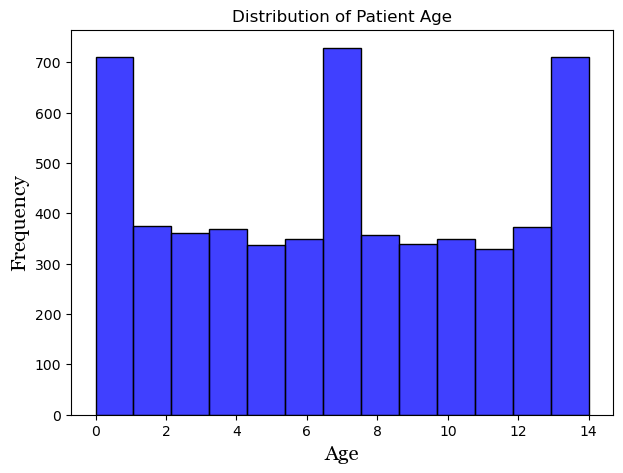

In [26]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Patient Age'], bins=13,color="blue")
plt.title('Distribution of Patient Age')
plt.xlabel('Age',fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Frequency',fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.show()

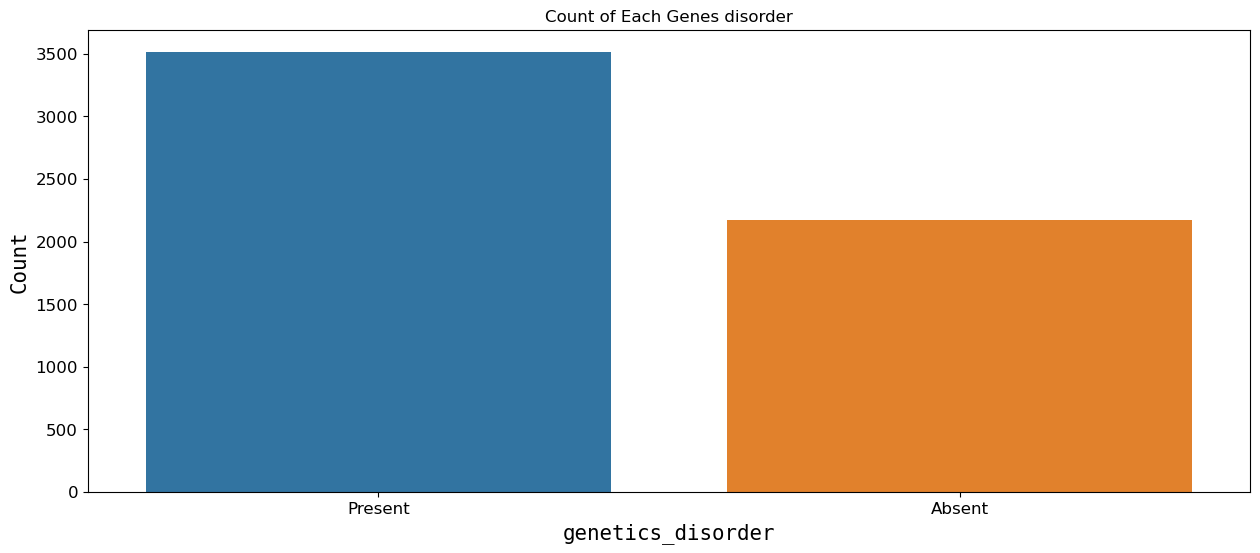

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x='genetics_disorder', data=df)
plt.title('Count of Each Genes disorder')
plt.xlabel('genetics_disorder',fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Count', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

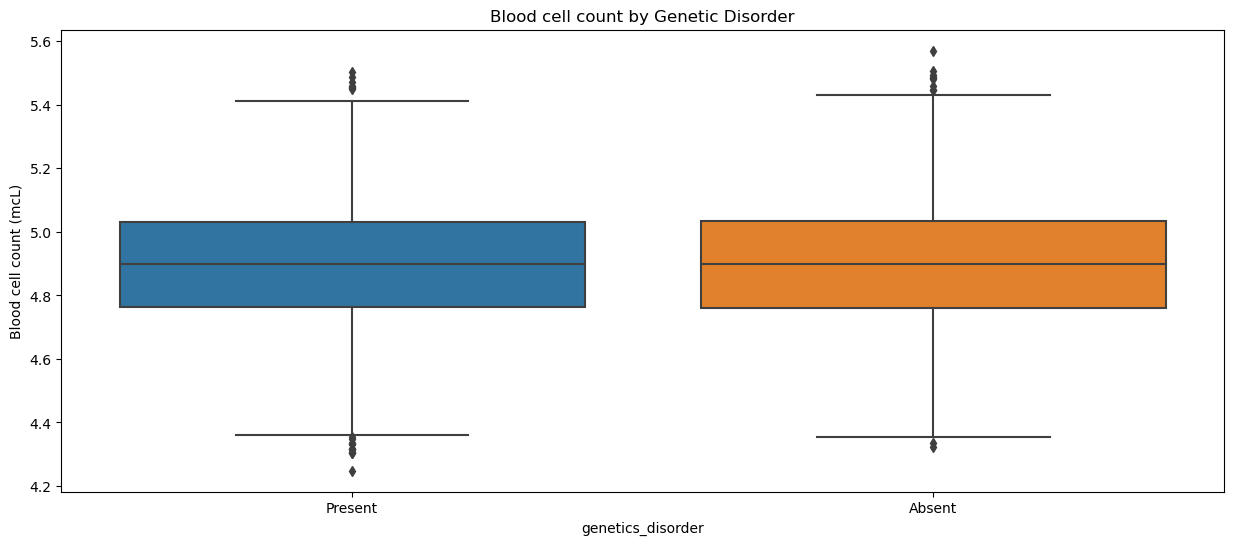

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='genetics_disorder', y='Blood cell count (mcL)', data=df)
plt.title('Blood cell count by Genetic Disorder')
plt.xlabel('genetics_disorder')
plt.ylabel('Blood cell count (mcL)')
plt.show()

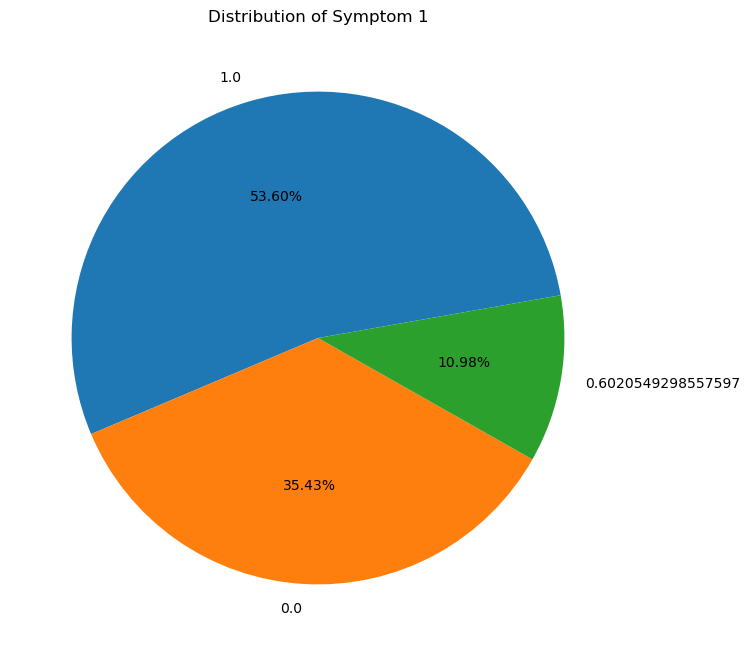

In [29]:
symptom1_counts = df['Symptom 1'].value_counts()
plt.style.use("default")
plt.figure(figsize=(8, 8))
plt.pie(symptom1_counts, labels=symptom1_counts.index, autopct='%1.2f%%', startangle=10)
plt.title('Distribution of Symptom 1')
plt.show()

# step 2.2: Separting Numeric and category Data

In [30]:
df_num=df.select_dtypes(['float','int'])
df_num

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3
0,2.000000,4.760603,34.525006,42.214597,0.0,0.0,0.0,9.857562,1.0,1.000000,1.000000
1,4.000000,4.910669,34.525006,23.000000,0.0,0.0,0.0,5.522560,1.0,0.577769,1.000000
2,6.000000,4.893297,41.000000,22.000000,0.0,0.0,0.0,7.482597,0.0,1.000000,1.000000
3,12.000000,4.705280,21.000000,42.214597,0.0,0.0,0.0,7.919321,0.0,0.000000,1.000000
4,11.000000,4.720703,32.000000,42.214597,0.0,0.0,0.0,4.098210,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5680,3.000000,4.917074,24.000000,31.000000,0.0,0.0,0.0,9.927349,0.0,1.000000,0.557134
5681,1.000000,4.862923,46.000000,59.000000,0.0,0.0,0.0,3.529117,0.0,1.000000,1.000000
5682,3.000000,4.912528,34.525006,42.214597,0.0,0.0,0.0,9.666321,0.0,1.000000,0.000000
5683,10.000000,4.881958,44.000000,55.000000,0.0,0.0,0.0,9.094955,0.0,1.000000,0.000000


In [31]:
df_cat=df.select_dtypes(['object'])
df_cat

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,Blood test result,genetics_disorder
0,PID0x6418,Yes,No,Yes,No,Yes,Ambiguous,Yes,Not applicable,Singular defects,slightly abnormal,Present
1,PID0x25d5,Yes,Yes,No,No,Yes,Ambiguous,No,Not applicable,Multiple,normal,Present
2,PID0x4a82,Yes,No,No,No,Yes,Ambiguous,No record,Not applicable,Singular,normal,Present
3,PID0x4ac8,Yes,No,Yes,No,Yes,Male,Not available,No,Singular,inconclusive,Present
4,PID0x1bf7,Yes,No,Yes,Yes,Yes,Male,Not available,Not applicable,Multiple,slightly abnormal,Present
...,...,...,...,...,...,...,...,...,...,...,...,...
5680,PID0x6bf,Yes,Yes,Yes,Yes,Yes,Ambiguous,No record,Not applicable,Multiple,normal,Present
5681,PID0x4969,Yes,Yes,Yes,No,Yes,Female,Yes,Not applicable,Multiple,slightly abnormal,Absent
5682,PID0xcd2,No,Yes,Yes,No,Yes,Ambiguous,Yes,Not applicable,Multiple,slightly abnormal,Absent
5683,PID0x3a35,Yes,Yes,No,No,Yes,Ambiguous,No record,Not applicable,Multiple,slightly abnormal,Absent


# step 2.3: Using Label Encoder for converting category data into numeric

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,Blood test result,genetics_disorder
0,3686,1,0,1,0,0,0,3,1,2,0,1
1,905,1,1,0,0,0,0,0,1,0,3,1
2,2533,1,0,0,0,0,0,1,1,1,3,1
3,2545,1,0,1,0,0,2,2,0,1,2,1
4,509,1,0,1,1,0,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5680,4035,1,1,1,1,0,0,1,1,0,3,1
5681,2490,1,1,1,0,0,1,3,1,0,4,0
5682,5535,0,1,1,0,0,0,3,1,0,4,0
5683,1827,1,1,0,0,0,0,1,1,0,0,0


In [35]:
df_cat

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,Blood test result,genetics_disorder
0,3686,1,0,1,0,0,0,3,1,2,0,1
1,905,1,1,0,0,0,0,0,1,0,3,1
2,2533,1,0,0,0,0,0,1,1,1,3,1
3,2545,1,0,1,0,0,2,2,0,1,2,1
4,509,1,0,1,1,0,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5680,4035,1,1,1,1,0,0,1,1,0,3,1
5681,2490,1,1,1,0,0,1,3,1,0,4,0
5682,5535,0,1,1,0,0,0,3,1,0,4,0
5683,1827,1,1,0,0,0,0,1,1,0,0,0


# Step 2.4: Features Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()

In [38]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-1.18180601e+00, -6.88779615e-01, -8.70017458e-16, ...,
         8.61669205e-01,  9.07290884e-01,  9.44377801e-01],
       [-7.05684016e-01,  6.56155999e-02, -8.70017458e-16, ...,
         8.61669205e-01,  0.00000000e+00,  9.44377801e-01],
       [-2.29562028e-01, -2.17131643e-02,  7.92824580e-01, ...,
        -1.30362764e+00,  9.07290884e-01,  9.44377801e-01],
       ...,
       [-9.43745011e-01,  7.49619714e-02, -8.70017458e-16, ...,
        -1.30362764e+00,  9.07290884e-01, -1.18804747e+00],
       [ 7.22681949e-01, -7.87168251e-02,  1.16015680e+00, ...,
        -1.30362764e+00,  9.07290884e-01, -1.18804747e+00],
       [ 4.22881275e-16, -4.21528416e-01,  4.25492364e-01, ...,
         8.61669205e-01,  9.07290884e-01,  9.44377801e-01]])

In [39]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

       Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
0    -1.181806e+00               -0.688780 -8.700175e-16      0.000000   
1    -7.056840e-01                0.065616 -8.700175e-16     -1.771913   
2    -2.295620e-01               -0.021713  7.928246e-01     -1.864130   
3     1.198804e+00               -0.966892 -1.656057e+00      0.000000   
4     9.607429e-01               -0.889362 -3.091721e-01      0.000000   
...            ...                     ...           ...           ...   
5680 -9.437450e-01                0.097815 -1.288725e+00     -1.034177   
5681 -1.419867e+00               -0.174407  1.405045e+00      1.547900   
5682 -9.437450e-01                0.074962 -8.700175e-16      0.000000   
5683  7.226819e-01               -0.078717  1.160157e+00      1.179032   
5684  4.228813e-16               -0.421528  4.254924e-01      0.000000   

      Test 1  Test 2  Test 3  \
0        0.0     0.0     0.0   
1        0.0     0.0     0.0   
2        0.0   

# step 2.5: Concatenate Numerical and Categorical Columns

In [40]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,...,Inherited from father,Maternal gene,Paternal gene,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,Blood test result,genetics_disorder
0,2.000000,4.760603,34.525006,42.214597,0.0,0.0,0.0,9.857562,1.0,1.000000,...,0,1,0,0,0,3,1,2,0,1
1,4.000000,4.910669,34.525006,23.000000,0.0,0.0,0.0,5.522560,1.0,0.577769,...,1,0,0,0,0,0,1,0,3,1
2,6.000000,4.893297,41.000000,22.000000,0.0,0.0,0.0,7.482597,0.0,1.000000,...,0,0,0,0,0,1,1,1,3,1
3,12.000000,4.705280,21.000000,42.214597,0.0,0.0,0.0,7.919321,0.0,0.000000,...,0,1,0,0,2,2,0,1,2,1
4,11.000000,4.720703,32.000000,42.214597,0.0,0.0,0.0,4.098210,0.0,0.000000,...,0,1,1,0,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,3.000000,4.917074,24.000000,31.000000,0.0,0.0,0.0,9.927349,0.0,1.000000,...,1,1,1,0,0,1,1,0,3,1
5681,1.000000,4.862923,46.000000,59.000000,0.0,0.0,0.0,3.529117,0.0,1.000000,...,1,1,0,0,1,3,1,0,4,0
5682,3.000000,4.912528,34.525006,42.214597,0.0,0.0,0.0,9.666321,0.0,1.000000,...,1,1,0,0,0,3,1,0,4,0
5683,10.000000,4.881958,44.000000,55.000000,0.0,0.0,0.0,9.094955,0.0,1.000000,...,1,0,0,0,0,1,1,0,0,0


# step 2.6:Splitting Data into X and Y

In [41]:
x=df_new.drop("genetics_disorder",axis=1)
x

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,...,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Birth defects,Blood test result
0,2.000000,4.760603,34.525006,42.214597,0.0,0.0,0.0,9.857562,1.0,1.000000,...,1,0,1,0,0,0,3,1,2,0
1,4.000000,4.910669,34.525006,23.000000,0.0,0.0,0.0,5.522560,1.0,0.577769,...,1,1,0,0,0,0,0,1,0,3
2,6.000000,4.893297,41.000000,22.000000,0.0,0.0,0.0,7.482597,0.0,1.000000,...,1,0,0,0,0,0,1,1,1,3
3,12.000000,4.705280,21.000000,42.214597,0.0,0.0,0.0,7.919321,0.0,0.000000,...,1,0,1,0,0,2,2,0,1,2
4,11.000000,4.720703,32.000000,42.214597,0.0,0.0,0.0,4.098210,0.0,0.000000,...,1,0,1,1,0,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,3.000000,4.917074,24.000000,31.000000,0.0,0.0,0.0,9.927349,0.0,1.000000,...,1,1,1,1,0,0,1,1,0,3
5681,1.000000,4.862923,46.000000,59.000000,0.0,0.0,0.0,3.529117,0.0,1.000000,...,1,1,1,0,0,1,3,1,0,4
5682,3.000000,4.912528,34.525006,42.214597,0.0,0.0,0.0,9.666321,0.0,1.000000,...,0,1,1,0,0,0,3,1,0,4
5683,10.000000,4.881958,44.000000,55.000000,0.0,0.0,0.0,9.094955,0.0,1.000000,...,1,1,0,0,0,0,1,1,0,0


In [42]:
y=df_new["genetics_disorder"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5680    1
5681    0
5682    0
5683    0
5684    1
Name: genetics_disorder, Length: 5685, dtype: int32

# since the data is imbalance , oversampling will be used

In [43]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [44]:
x=x_ros
y=y_ros

# step 3: Model Evaluation

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=45)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [47]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)

# svm

In [48]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [49]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61      1430
           1       0.60      0.62      0.61      1383

    accuracy                           0.61      2813
   macro avg       0.61      0.61      0.61      2813
weighted avg       0.61      0.61      0.61      2813



LogisticRegression()

In [50]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66      1430
           1       0.64      0.60      0.62      1383

    accuracy                           0.64      2813
   macro avg       0.64      0.64      0.64      2813
weighted avg       0.64      0.64      0.64      2813



KNeighborsClassifier()

In [51]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1430
           1       0.72      0.66      0.69      1383

    accuracy                           0.70      2813
   macro avg       0.71      0.70      0.70      2813
weighted avg       0.71      0.70      0.70      2813



DecisionTreeClassifier()

#mymodel(svm)

In [52]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1430
           1       0.76      0.61      0.68      1383

    accuracy                           0.71      2813
   macro avg       0.72      0.71      0.71      2813
weighted avg       0.72      0.71      0.71      2813



RandomForestClassifier(random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gs=GridSearchCV(dt,parameters,verbose=4) 

In [55]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

# 4.1.2 Getting best HyperParameters :

In [56]:
gs.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [63]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=2,min_samples_split=5)
                          
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1430
           1       0.73      0.61      0.66      1383

    accuracy                           0.70      2813
   macro avg       0.70      0.69      0.69      2813
weighted avg       0.70      0.70      0.69      2813



In [58]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gs=GridSearchCV(rf,parameters,verbose=4) 

In [59]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

In [60]:
gs.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [64]:
rf=RandomForestClassifier(max_depth=20,min_samples_leaf=2,min_samples_split=2)
                          
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74      1430
           1       0.75      0.59      0.67      1383

    accuracy                           0.71      2813
   macro avg       0.71      0.70      0.70      2813
weighted avg       0.71      0.71      0.70      2813



Accuracy:-

mymodel(logreg):- 61

mymodel(knn):- 67

mymodel(dt):-70

mymodel(rf):-71





# Conclusion:

In the above project,logistic regression, knn classifier,decision tree classifier & random forest classifier are used to get best accuracy for the dataset.

Random Forest Classifier is providing the highest accuracy score of 71.00 percent among all the ML Models.

Thus, for the Genetic disorder Prediction Dataset, the best accuracy can be achieved using Random Forest Model.

The genetic disorder prediction model demonstrates promising accuracy in forecasting predisposition to hereditary conditions.
